In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 基本库

有用的数据：地区号，商品编号，大类号，小类号，交易方式，交易价格，交易量

# 数据预处理

In [2]:
# 训练数据data-train
df = pd.read_csv('./示例数据/order_train0.csv')
df.head(5)

,order_date,sales_region_code,item_code,first_cate_code,second_cate_code,sales_chan_name,item_price,ord_qty
0,2015/9/2,104,20028,301,405,offline,1005.0,11
1,2015/9/3,102,20354,303,401,offline,1420.0,64
2,2015/9/4,101,20586,306,407,offline,978.0,7
3,2015/9/4,101,20230,306,407,offline,864.0,66
4,2015/9/4,105,21619,306,402,online,274.0,102


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59769 entries, 0 to 59768
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_date         59769 non-null  object 
 1   sales_region_code  59769 non-null  int64  
 2   item_code          59769 non-null  int64  
 3   first_cate_code    59769 non-null  int64  
 4   second_cate_code   59769 non-null  int64  
 5   sales_chan_name    59769 non-null  object 
 6   item_price         59769 non-null  float64
 7   ord_qty            59769 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 3.6+ MB


## —————交易价格和交易量的关系———————

## 1.先进行描述性分析

In [7]:
df.item_price.describe()

count    59769.000000
mean      1074.334474
std        966.881714
min          1.000000
25%        597.000000
50%        880.280000
75%       1291.000000
max      47911.000000
Name: item_price, dtype: float64

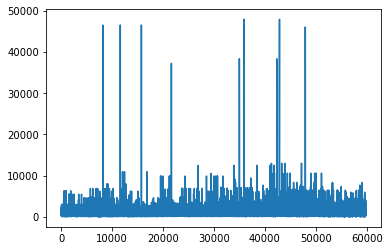

In [6]:
plt.plot(df['item_price'])
plt.show()

In [19]:
df.ord_qty.describe()

count    59769.000000
mean        91.443139
std        195.407986
min          1.000000
25%         10.000000
50%         29.000000
75%        101.000000
max      12480.000000
Name: ord_qty, dtype: float64

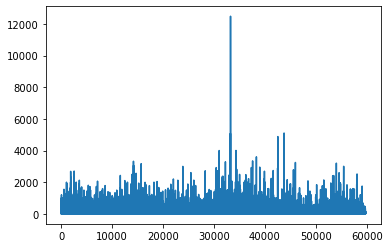

In [20]:
plt.plot(df['ord_qty'])
plt.show()

## 删除异常值

箱线法去值，上须Q3 + 1.5*（Q3-Q1），下须Q1-1.5*(Q3-Q1)，超过上须或者低于下须的数据点都可以认为是异常值。

Q1 25%分位点 下四分位点
Q3 75%分位点 上四分位点

大量数据，所以做删除处理

min          1.000000
25%        597.000000
50%        880.280000
75%       1291.000000
max      47911.000000

min          1.000000
25%         10.000000
50%         29.000000
75%        101.000000
max      12480.000000

In [15]:
价格上须 = 1291 - 1.5*(1291-597)
价格下须 = 597 + 1.5*(1291-597)
print(价格上须,价格下须)

250.0 1638.0


In [18]:
交易上须 = 101 - 1.5*(101-10)
交易下须 = 10 + 1.5*(101-10)
print(交易上须,交易下须)

-35.5 146.5


### 做一个价格和交易量的线性回归

## —————交易价格和交易量的关系——————

## ————地区和交易方式的关系—————

In [42]:
df.sales_chan_name

0        offline
1        offline
2        offline
3        offline
4         online
          ...   
59764    offline
59765    offline
59766    offline
59767    offline
59768    offline
Name: sales_chan_name, Length: 59769, dtype: object

## ————商品大类和交易方式的关系————